In [4]:
# Week 11 - Segmentation (Simplified)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

Week 11 - Segmentation (Thresholding)

This practical demonstrates simple HSV thresholding and GrabCut using `matplotlib` for visualization.
Place your images in the `images/` folder and run cells in order.

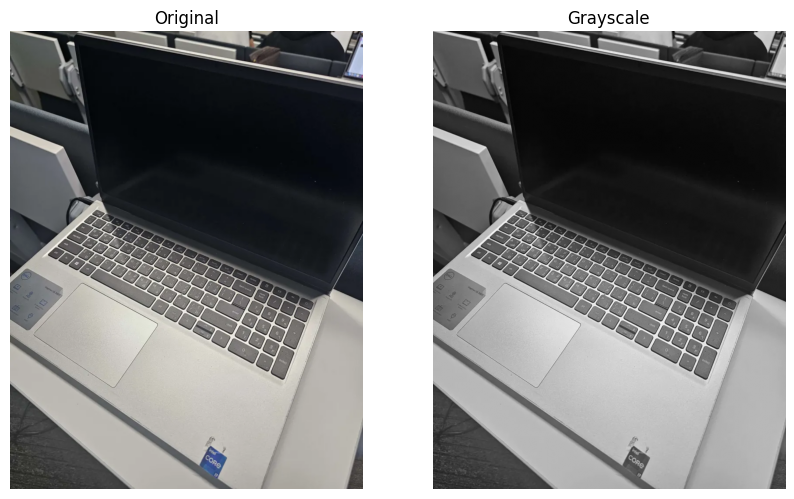

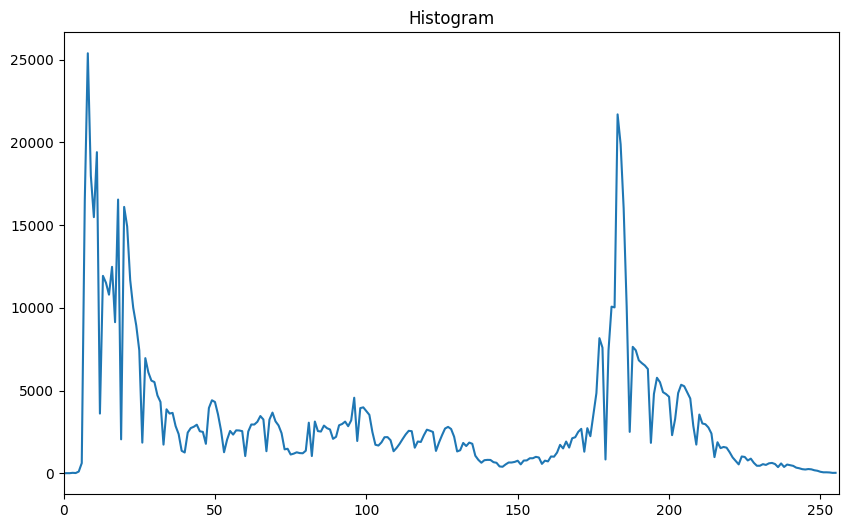

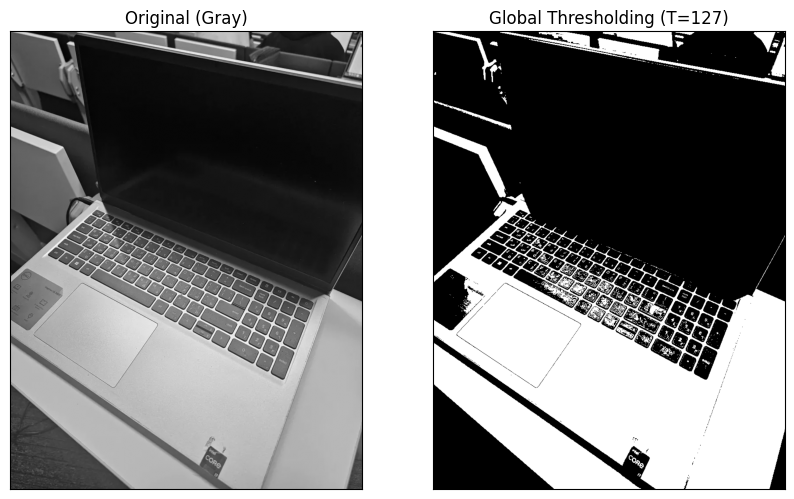

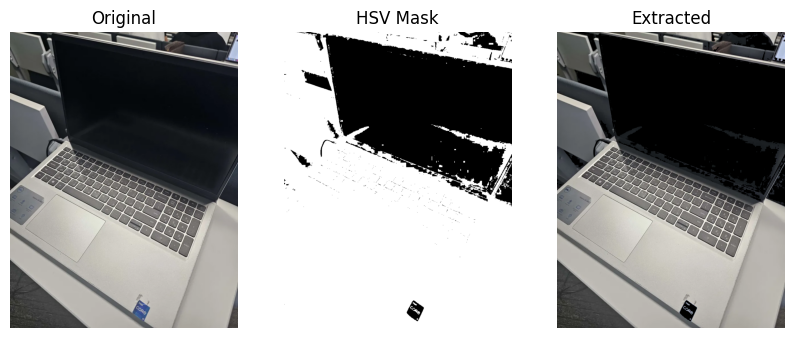

In [ ]:
# Load first image from images/ and show grayscale + histogram (school-style)
img_dir = Path('images')
imgs = list(img_dir.glob('*.jpg')) + list(img_dir.glob('*.jpeg')) + list(img_dir.glob('*.png'))
if not imgs:
    print('No images found in `images/`. Please add your photos and re-run this cell.')
else:
    img_path = imgs[0]
    img = cv.imread(str(img_path))
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Show original and grayscale
    plt.subplot(1,2,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')
    plt.show()
    # Histogram (like the course sample)
    hist = cv.calcHist([gray],[0],None,[256],[0,256])
    plt.plot(hist); plt.xlim([0,256]); plt.title('Histogram'); plt.show()
    # Basic global thresholding (example T=127)
    ret, th = cv.threshold(gray,127,255,cv.THRESH_BINARY)
    titles = ['Original (Gray)', 'Global Thresholding (T=127)']
    images = [gray, th]
    for i in range(2):
        plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    # tweak these values to match your images; here we threshold low saturation to remove colorful background
    lower = np.array([0,0,0])
    upper = np.array([180,60,255])
    mask = cv.inRange(hsv, lower, upper)
    res = cv.bitwise_and(img, img, mask=mask)
    plt.subplot(1,3,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(mask, cmap='gray'); plt.title('HSV Mask'); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB)); plt.title('Extracted'); plt.axis('off')
    plt.show()

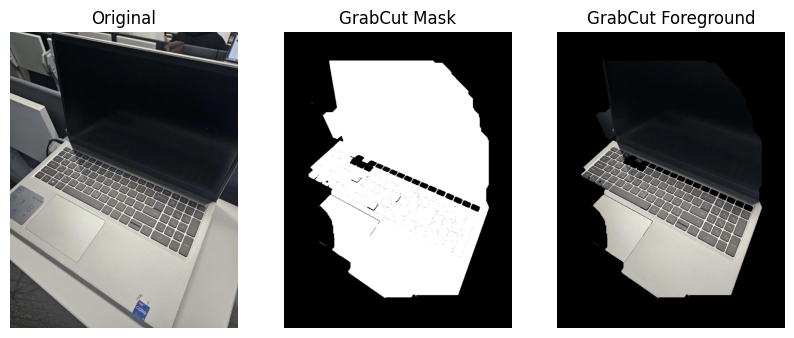

In [6]:
# GrabCut example (simple rectangle)
# This is a straightforward GrabCut usage that matches the school simplicity requirements
if not imgs:
    print('No images loaded for GrabCut. Run the previous cell with images present.')
else:
    img_gc = img.copy()
    mask = np.zeros(img_gc.shape[:2], np.uint8)
    h, w = img_gc.shape[:2]
    # rectangle covering most of the image; adjust if needed
    rect = (int(w*0.1), int(h*0.1), int(w*0.8), int(h*0.8))
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)
    cv.grabCut(img_gc, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
    img_gc_fg = img_gc * mask2[:,:,np.newaxis]
    plt.subplot(1,3,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(mask2, cmap='gray'); plt.title('GrabCut Mask'); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(cv.cvtColor(img_gc_fg, cv.COLOR_BGR2RGB)); plt.title('GrabCut Foreground'); plt.axis('off')
    plt.show()

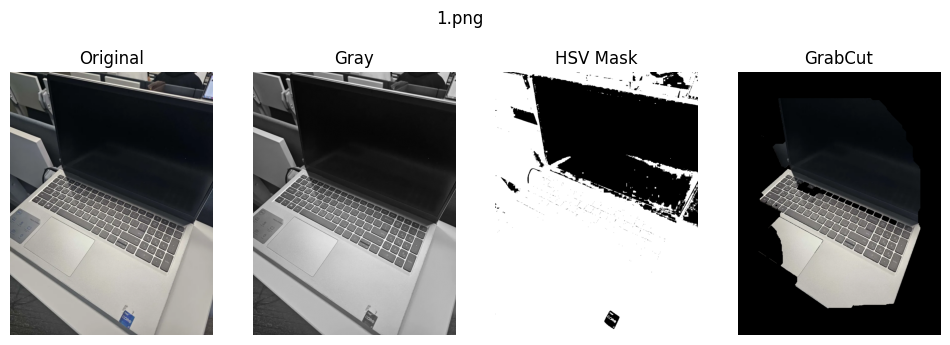

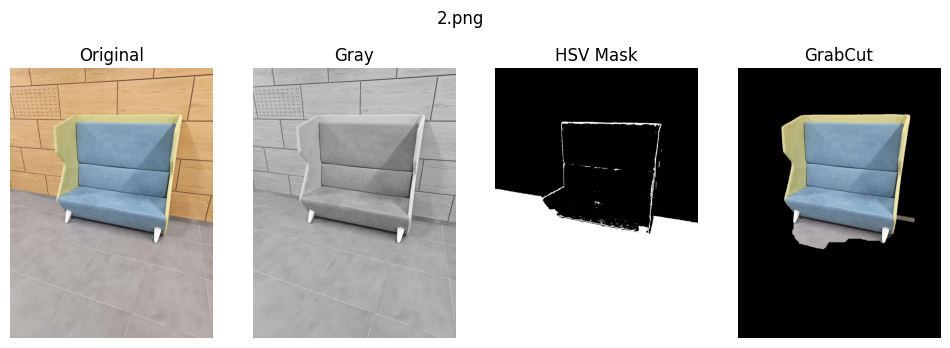

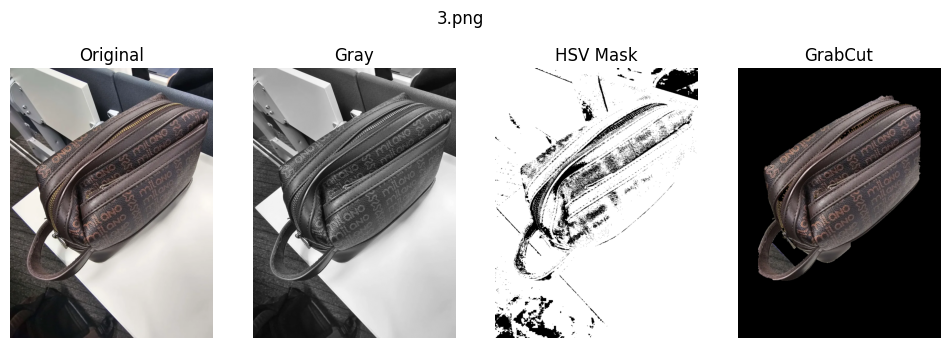

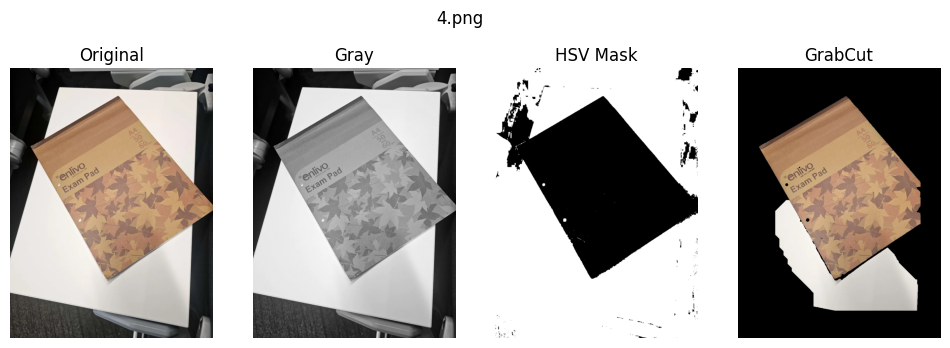

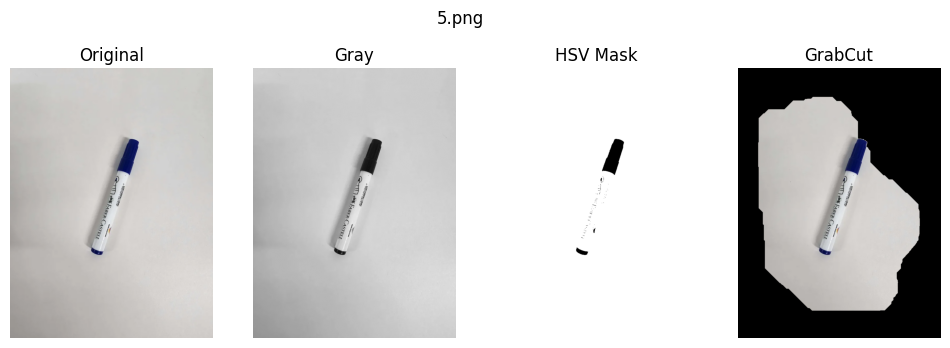

In [7]:
# Process ALL images and display simple comparisons (Original | Gray | HSV mask | GrabCut)
img_dir = Path('images')
imgs_all = sorted(list(img_dir.glob('*.jpg')) + list(img_dir.glob('*.jpeg')) + list(img_dir.glob('*.png')))
if not imgs_all:
    print('No images found in `images/`. Add images named 1.png ... 5.png or similar and re-run.')
else:
    for p in imgs_all:
        img_i = cv.imread(str(p))
        if img_i is None:
            print('Could not read', p); continue
        gray_i = cv.cvtColor(img_i, cv.COLOR_BGR2GRAY)
        # HSV mask (simple threshold as in previous cell)
        hsv_i = cv.cvtColor(img_i, cv.COLOR_BGR2HSV)
        lower = np.array([0,0,0])
        upper = np.array([180,60,255])
        hsv_mask_i = cv.inRange(hsv_i, lower, upper)
        hsv_res_i = cv.bitwise_and(img_i, img_i, mask=hsv_mask_i)
        # GrabCut (simple rect)
        img_gc_i = img_i.copy()
        mask_gc = np.zeros(img_gc_i.shape[:2], np.uint8)
        h, w = img_gc_i.shape[:2]
        rect = (int(w*0.1), int(h*0.1), int(w*0.8), int(h*0.8))
        bgdModel = np.zeros((1,65), np.float64)
        fgdModel = np.zeros((1,65), np.float64)
        cv.grabCut(img_gc_i, mask_gc, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
        mask2 = np.where((mask_gc==2)|(mask_gc==0), 0, 1).astype('uint8')
        gc_res_i = img_gc_i * mask2[:,:,np.newaxis]
        plt.figure(figsize=(12,4))
        plt.suptitle(p.name)
        plt.subplot(1,4,1); plt.imshow(cv.cvtColor(img_i, cv.COLOR_BGR2RGB)); plt.title('Original'); plt.axis('off')
        plt.subplot(1,4,2); plt.imshow(gray_i, cmap='gray'); plt.title('Gray'); plt.axis('off')
        plt.subplot(1,4,3); plt.imshow(hsv_mask_i, cmap='gray'); plt.title('HSV Mask'); plt.axis('off')
        plt.subplot(1,4,4); plt.imshow(cv.cvtColor(gc_res_i, cv.COLOR_BGR2RGB)); plt.title('GrabCut'); plt.axis('off')
        plt.show()